Loading data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
plt.style.use('ggplot')

In [3]:
train=pd.read_csv('/content/train.csv')
test=pd.read_csv('/content/test.csv')
full_data=pd.concat([train,test],ignore_index=True)

In [4]:
full_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Data cleaning

In [5]:
full_data.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [6]:
full_data.shape

(1309, 12)

In [7]:
full_data.Embarked.mode()

0    S
dtype: object

In [8]:
full_data['Embarked'].fillna('S',inplace=True)

In [9]:
full_data[full_data.Fare.isnull()]
full_data.Fare.fillna(full_data[full_data.Pclass==3]['Fare'].median(),inplace=True)

In [10]:
full_data.isna().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin          1014
Embarked          0
dtype: int64

In [11]:
def fill_missing_ages(df):
    ages_missing_index = df[df['Age'].isnull()].index
    for idx in ages_missing_index:
        row = df.loc[idx, :]
        median_age = df['Age'].median()
        media_age_pred = df[(df['Pclass'] == row['Pclass']) & (df['SibSp'] == row['SibSp']) & (df['Parch'] == row['Parch'])]['Age'].median()
        if np.isnan(media_age_pred):
            df.loc[idx, 'Age'] = median_age
        else:
            df.loc[idx, 'Age'] = media_age_pred

In [12]:
print('Median age before filling missing values: ', full_data['Age'].median())
fill_missing_ages(full_data)
print('Median age after filling missing values: ', full_data['Age'].median())

Median age before filling missing values:  28.0
Median age after filling missing values:  26.0


In [13]:
full_data.isna().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age               0
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin          1014
Embarked          0
dtype: int64

In [14]:
df = full_data

In [15]:
for i in df.index:
    if pd.isnull(df.at[i, 'Cabin']) :
        df.at[i, 'Cabin'] = 0
    else:
        df.at[i, 'Cabin'] = 1

In [16]:
for i in df.index:
    if df.at[i, 'Sex']=="male" :
        df.at[i, 'Sex'] = 1
    else:
        df.at[i, 'Sex'] = 0

In [17]:
for i in df.index:
    if df.at[i, 'Embarked']=="C" :
        df.at[i, 'Embarked'] = 0
    elif df.at[i, 'Embarked']=="Q" :
        df.at[i, 'Embarked'] = 1    
    else:
        df.at[i, 'Embarked'] = 2

In [18]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,0,2
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,1,0
2,3,1.0,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,0,2
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,1,2
4,5,0.0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,0,2


In [19]:
df = df.drop(['PassengerId', 'Name', 'Ticket'], axis = 1)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0.0,3,1,22.0,1,0,7.2500,0,2
1,1.0,1,0,38.0,1,0,71.2833,1,0
2,1.0,3,0,26.0,0,0,7.9250,0,2
3,1.0,1,0,35.0,1,0,53.1000,1,2
4,0.0,3,1,35.0,0,0,8.0500,0,2


In [20]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

In [21]:
models=[KNeighborsClassifier(),LogisticRegression(),GaussianNB(),DecisionTreeClassifier(),RandomForestClassifier(),
       GradientBoostingClassifier(),SVC()]

In [22]:
import numpy as np
from sklearn.model_selection import train_test_split
X = df.iloc[:891]
X = X[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin', 'Embarked']]
y = df.Survived[:891]

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit(X).transform(X)

X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size = 0.20, random_state=42)

In [23]:
names=['KNN','LR','NB','Tree','RF','GDBT','SVM']
for name, model in zip(names,models):
    score=cross_val_score(model,X_train,y_train,cv=5)
    print("{}:{},{}".format(name,score.mean(),score))

KNN:0.7991332611050921,[0.81818182 0.7972028  0.79577465 0.79577465 0.78873239]
LR:0.7962966610853935,[0.81818182 0.81118881 0.78873239 0.73943662 0.82394366]
NB:0.7709937949374569,[0.81118881 0.78321678 0.79577465 0.72535211 0.73943662]
Tree:0.7598936274992614,[0.72727273 0.74825175 0.76760563 0.75352113 0.8028169 ]
RF:0.8020191076529104,[0.8041958  0.76223776 0.8028169  0.78169014 0.85915493]
GDBT:0.813158672313602,[0.83916084 0.81818182 0.78873239 0.8028169  0.81690141]
SVM:0.8173643258150302,[0.83916084 0.83216783 0.81690141 0.76760563 0.83098592]


In [24]:
model = GradientBoostingClassifier()

In [25]:
model.fit(X,y)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [26]:
model.feature_importances_

array([0.12366892, 0.47497407, 0.1370478 , 0.0461912 , 0.0024232 ,
       0.15088591, 0.04636379, 0.0184451 ])

In [27]:
X.columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin', 'Embarked'], dtype='object')

In [28]:
fi=pd.DataFrame({'importance':model.feature_importances_},index=X.columns)

In [29]:
fi.sort_values('importance',ascending=False)

,importance
Sex,0.474974
Fare,0.150886
Age,0.137048
Pclass,0.123669
Cabin,0.046364
SibSp,0.046191
Embarked,0.018445
Parch,0.002423


Text(0.5, 1.0, 'Feature Importance')

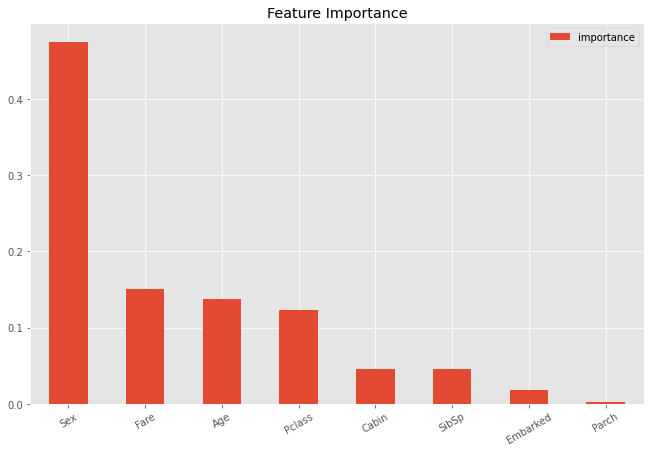

In [30]:
fi.sort_values('importance',ascending=False).plot.bar(figsize=(11,7))
plt.xticks(rotation=30)
plt.title('Feature Importance',size='x-large')

Hyperparameter tuning

In [31]:
from sklearn.model_selection import GridSearchCV

KNN

In [32]:
param_grid={'n_neighbors':[1,2,3,4,5,6,7,8,9]}
grid_search=GridSearchCV(KNeighborsClassifier(),param_grid,cv=5)
grid_search.fit(X_train,y_train)
grid_search.best_params_,grid_search.best_score_

({'n_neighbors': 9}, 0.810400866738895)

Logistic Regression

In [33]:
param_grid={'C':[0.01,0.1,1,10]}
grid_search=GridSearchCV(LogisticRegression(),param_grid,cv=5)
grid_search.fit(X_train,y_train)
grid_search.best_params_,grid_search.best_score_

({'C': 0.01}, 0.8005318625036935)

In [34]:
param_grid={'C':[0.04,0.06,0.08,0.1,0.12,0.14]}
grid_search=GridSearchCV(LogisticRegression(),param_grid,cv=5)
grid_search.fit(X_train,y_train)
grid_search.best_params_,grid_search.best_score_

({'C': 0.14}, 0.7963065103910175)

SVM

In [35]:
param_grid={'C':[0.01,0.1,1,10],'gamma':[0.01,0.1,1,10]}
grid_search=GridSearchCV(SVC(),param_grid,cv=5)
grid_search.fit(X_train,y_train)
grid_search.best_params_,grid_search.best_score_

({'C': 1, 'gamma': 0.1}, 0.817374175120654)

In [36]:
param_grid={'C':[2,4,6,8,10,12,14],'gamma':[0.008,0.01,0.012,0.015,0.02]}
grid_search=GridSearchCV(SVC(),param_grid,cv=5)
grid_search.fit(X_train,y_train)
grid_search.best_params_,grid_search.best_score_

({'C': 10, 'gamma': 0.02}, 0.8201615286122328)

In [37]:
param_grid={'n_estimators':[30,50,80,120,200],'learning_rate':[0.05,0.1,0.5,1],'max_depth':[1,2,3,4,5]}
grid_search=GridSearchCV(GradientBoostingClassifier(),param_grid,cv=5)
grid_search.fit(X_train,y_train)
grid_search.best_params_,grid_search.best_score_

({'learning_rate': 0.5, 'max_depth': 2, 'n_estimators': 30},
 0.8300403821530582)

Ensemble methods

Bagging

In [38]:
from sklearn.ensemble import BaggingClassifier
bagging=BaggingClassifier(LogisticRegression(C=0.06),n_estimators=100)

Voting

In [39]:
from sklearn.ensemble import VotingClassifier

clf1=LogisticRegression(C=0.01)
clf2=RandomForestClassifier(n_estimators=500)
clf3=GradientBoostingClassifier(n_estimators=30,learning_rate=0.5,max_depth=2)
clf4=SVC(C=10,gamma=0.02,probability=True)
clf5=KNeighborsClassifier(n_neighbors=8)

In [40]:
eclf_hard=VotingClassifier(estimators=[('LR',clf1),('RF',clf2),('GDBT',clf3),('SVM',clf4),('KNN',clf5)])

In [41]:
# add weights
eclfW_hard=VotingClassifier(estimators=[('LR',clf1),('RF',clf2),('GDBT',clf3),('SVM',clf4),('KNN',clf5)],weights=[1,1,2,2,1])

In [42]:
# soft voting
eclf_soft=VotingClassifier(estimators=[('LR',clf1),('RF',clf2),('GDBT',clf3),('SVM',clf4),('KNN',clf5)],voting='soft')

In [43]:
# add weights
eclfW_soft=VotingClassifier(estimators=[('LR',clf1),('RF',clf2),('GDBT',clf3),('SVM',clf4),('KNN',clf5)],voting='soft',weights=[1,1,2,2,1])

In [44]:
models=[KNeighborsClassifier(n_neighbors=8),LogisticRegression(C=0.06),GaussianNB(),DecisionTreeClassifier(),RandomForestClassifier(n_estimators=500),
        GradientBoostingClassifier(n_estimators=120,learning_rate=0.12,max_depth=4),SVC(C=4,gamma=0.015),
        eclf_hard,eclf_soft,eclfW_hard,eclfW_soft,bagging]

In [45]:
names=['KNN','LR','NB','CART','RF','GBT','SVM','VC_hard','VC_soft','VCW_hard','VCW_soft','Bagging']
for name,model in zip(names,models):
    score=cross_val_score(model,X_scaled,y,cv=5)
    print("{}: {},{}".format(name,score.mean(),score))

KNN: 0.8125729709371665,[0.81005587 0.78651685 0.80898876 0.80337079 0.85393258]
LR: 0.7946017199171427,[0.80446927 0.78651685 0.78651685 0.7752809  0.82022472]
NB: 0.767760969179587,[0.69273743 0.74719101 0.79775281 0.79213483 0.80898876]
CART: 0.790157554453581,[0.75977654 0.78089888 0.83707865 0.75280899 0.82022472]
RF: 0.8047391877471597,[0.78212291 0.76966292 0.86516854 0.7752809  0.83146067]
GBT: 0.8327914129684263,[0.81564246 0.82022472 0.85955056 0.80898876 0.85955056]
SVM: 0.8069549934090766,[0.81005587 0.82022472 0.79213483 0.79213483 0.82022472]
VC_hard: 0.8249262444291006,[0.81564246 0.82022472 0.8258427  0.79775281 0.86516854]
VC_soft: 0.8193208210407382,[0.80446927 0.80337079 0.83146067 0.79775281 0.85955056]
VCW_hard: 0.8260498399347185,[0.81564246 0.81460674 0.83146067 0.80337079 0.86516854]
VCW_soft: 0.8181972255351203,[0.80446927 0.81460674 0.80898876 0.80898876 0.85393258]
Bagging: 0.7957190383528968,[0.81005587 0.78651685 0.78089888 0.7752809  0.8258427 ]


In [49]:
clf = GradientBoostingClassifier(random_state=0, n_estimators=30, max_depth=2, learning_rate=0.5)
clf.fit(X_train, y_train)
clf.predict(X_val)
clf.score(X_val, y_val)

0.8268156424581006

In [50]:
X_test = df.iloc[891:]
X_test = X_test[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin', 'Embarked']]

s = StandardScaler()
X_test_scaled = s.fit(X_test).transform(X_test)

In [51]:
pred = clf.predict(X_test_scaled)
tt=pd.DataFrame({'PassengerId':test.PassengerId,'Survived':pred})
tt.to_csv('result_3.csv',index=False)

In [64]:
sub = pd.read_csv('/content/result_3.csv')

In [65]:
sub.dtypes

PassengerId      int64
Survived       float64
dtype: object

In [66]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [67]:
sub = sub['Survived'].astype(int)

In [68]:
sub.dtypes

dtype('int64')

In [69]:
tt=pd.DataFrame({'PassengerId':test.PassengerId,'Survived':sub})
tt.to_csv('result_new.csv',index=False)